<a href="https://colab.research.google.com/github/Adn02/Intro-to-ML/blob/main/Homework/HW5/HW5Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import matplotlib.pyplot as plt
import torch.optim as optim
import torch

# **Pre-processing**


> **Separating desired Features and Outputs**


In [74]:
x = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]      # Y
y = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]  # X

t_c = torch.tensor(y)
t_u = torch.tensor(x)


t_un = 0.1 * t_u


> **Splitting Training and Validation Set**


In [75]:
samples = t_u.shape[0]
values = int(0.2 * samples)

shuffle = torch.randperm(samples)
train_idx = shuffle[:-values]
valid_idx = shuffle[-values:]

t_u_train = t_u[train_idx]
t_u_valid = t_u[valid_idx]

t_un_train = t_un[train_idx]
t_un_valid = t_un[valid_idx]

t_c_train = t_c[train_idx]
t_c_valid = t_c[valid_idx]


# **Training**



> **Linear Regression Training**




In [76]:
def lin_model(t_u, w, b):
  return w*t_u + b

def lin_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  for epoch in range(1, epochs+1):
    t_p_train = lin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_valid = lin_model(t_u_valid, *params)
    valid_loss = cost(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}')
  print('')
  return params



> **Non-linear Regression Training**




In [77]:
def nonlin_model(t_u, w2, w1, b):
  return w2*t_u**2 + w1*t_u + b

def cost(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def nonlin_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  for epoch in range(1, epochs+1):
    t_p_train = nonlin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_valid = nonlin_model(t_u_valid, *params)
    valid_loss = cost(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:}, \tValidation Loss: {valid_loss}')
  print('')
  return params

# **SGD Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [78]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-1)

print('Learning rate of 0.1')
nonlin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)

Learning rate of 0.1
Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 3500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 4000, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 4500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 5000, 	Training Loss: nan, 	Validation Loss: nan



tensor([nan, nan, nan], requires_grad=True)

> *Trained with LR of* ***1e-2***

In [79]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-2)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 8.403675079345703, 	Validation Loss: 4.697275638580322
Epochs: 1000, 	Training Loss: 8.399521827697754, 	Validation Loss: 4.594749927520752
Epochs: 1500, 	Training Loss: 8.39903450012207, 	Validation Loss: 4.610844135284424
Epochs: 2000, 	Training Loss: 8.398723602294922, 	Validation Loss: 4.625665664672852
Epochs: 2500, 	Training Loss: 8.398529052734375, 	Validation Loss: 4.638632774353027
Epochs: 3000, 	Training Loss: 8.398391723632812, 	Validation Loss: 4.649709224700928
Epochs: 3500, 	Training Loss: 8.398319244384766, 	Validation Loss: 4.658937931060791
Epochs: 4000, 	Training Loss: 8.398268699645996, 	Validation Loss: 4.6666107177734375
Epochs: 4500, 	Training Loss: 8.398235321044922, 	Validation Loss: 4.672919750213623
Epochs: 5000, 	Training Loss: 8.398212432861328, 	Validation Loss: 4.677994251251221



tensor([-1.5324, 21.6831, 31.7347], requires_grad=True)

> *Trained with LR of* ***1e-3***

In [80]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-3)

print('Learning rate of 0.001')
nonlin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)

Learning rate of 0.001
Epochs: 500, 	Training Loss: 238.50973510742188, 	Validation Loss: 229.13327026367188
Epochs: 1000, 	Training Loss: 75.58393859863281, 	Validation Loss: 77.45906066894531
Epochs: 1500, 	Training Loss: 28.015872955322266, 	Validation Loss: 29.8281307220459
Epochs: 2000, 	Training Loss: 14.127741813659668, 	Validation Loss: 14.104024887084961
Epochs: 2500, 	Training Loss: 10.072823524475098, 	Validation Loss: 8.52658748626709
Epochs: 3000, 	Training Loss: 8.88888168334961, 	Validation Loss: 6.363135814666748
Epochs: 3500, 	Training Loss: 8.543128967285156, 	Validation Loss: 5.441476345062256
Epochs: 4000, 	Training Loss: 8.442102432250977, 	Validation Loss: 5.015514373779297
Epochs: 4500, 	Training Loss: 8.4125394821167, 	Validation Loss: 4.806567192077637
Epochs: 5000, 	Training Loss: 8.403838157653809, 	Validation Loss: 4.700201988220215



tensor([-1.4393, 21.4363, 31.8146], requires_grad=True)

> *Trained with LR of* ***1e-4***

In [81]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-4)

print('Learning rate of 0.0001')
nonlin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 858.6043701171875, 	Validation Loss: 682.740234375
Epochs: 1000, 	Training Loss: 634.362548828125, 	Validation Loss: 583.4526977539062
Epochs: 1500, 	Training Loss: 552.8631591796875, 	Validation Loss: 513.2328491210938
Epochs: 2000, 	Training Loss: 489.17962646484375, 	Validation Loss: 455.389892578125
Epochs: 2500, 	Training Loss: 433.4704895019531, 	Validation Loss: 405.2010498046875
Epochs: 3000, 	Training Loss: 384.25439453125, 	Validation Loss: 360.96148681640625
Epochs: 3500, 	Training Loss: 340.7393798828125, 	Validation Loss: 321.7815246582031
Epochs: 4000, 	Training Loss: 302.262451171875, 	Validation Loss: 287.0307922363281
Epochs: 4500, 	Training Loss: 268.2403259277344, 	Validation Loss: 256.19073486328125
Epochs: 5000, 	Training Loss: 238.15711975097656, 	Validation Loss: 228.81192016601562



tensor([ 6.0195, 13.1713, 16.1138], requires_grad=True)

# **Adam Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [82]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-1)

print('Learning rate of 0.1')
nonlin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)

Learning rate of 0.1
Epochs: 500, 	Training Loss: 35.07783889770508, 	Validation Loss: 600.6097412109375
Epochs: 1000, 	Training Loss: 25.24614906311035, 	Validation Loss: 422.357421875
Epochs: 1500, 	Training Loss: 18.179141998291016, 	Validation Loss: 250.20547485351562
Epochs: 2000, 	Training Loss: 13.00792407989502, 	Validation Loss: 123.15242767333984
Epochs: 2500, 	Training Loss: 10.08259105682373, 	Validation Loss: 50.076995849609375
Epochs: 3000, 	Training Loss: 8.845559120178223, 	Validation Loss: 18.074447631835938
Epochs: 3500, 	Training Loss: 8.477374076843262, 	Validation Loss: 7.732101917266846
Epochs: 4000, 	Training Loss: 8.406505584716797, 	Validation Loss: 5.269930362701416
Epochs: 4500, 	Training Loss: 8.398621559143066, 	Validation Loss: 4.796293258666992
Epochs: 5000, 	Training Loss: 8.398191452026367, 	Validation Loss: 4.712553024291992



tensor([-1.5465e-02,  2.1731e+00,  3.1702e+01], requires_grad=True)

> *Trained with LR of* ***1e-2***

In [83]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-2)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 871.6930541992188, 	Validation Loss: 832.5169067382812
Epochs: 1000, 	Training Loss: 562.2626953125, 	Validation Loss: 764.0894775390625
Epochs: 1500, 	Training Loss: 306.7404479980469, 	Validation Loss: 713.1177368164062
Epochs: 2000, 	Training Loss: 146.6776123046875, 	Validation Loss: 681.7320556640625
Epochs: 2500, 	Training Loss: 69.63380432128906, 	Validation Loss: 660.8252563476562
Epochs: 3000, 	Training Loss: 41.869937896728516, 	Validation Loss: 639.3862915039062
Epochs: 3500, 	Training Loss: 34.13653564453125, 	Validation Loss: 610.2462158203125
Epochs: 4000, 	Training Loss: 31.500526428222656, 	Validation Loss: 571.1619873046875
Epochs: 4500, 	Training Loss: 29.394906997680664, 	Validation Loss: 522.6727294921875
Epochs: 5000, 	Training Loss: 27.048540115356445, 	Validation Loss: 465.990234375



tensor([-0.0788,  4.3958, 15.7947], requires_grad=True)

> *Trained with LR of* ***1e-3***

In [84]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-3)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 22071.1640625, 	Validation Loss: 754.6742553710938
Epochs: 1000, 	Training Loss: 4047.19189453125, 	Validation Loss: 828.6055297851562
Epochs: 1500, 	Training Loss: 1237.822021484375, 	Validation Loss: 862.529296875
Epochs: 2000, 	Training Loss: 1027.2274169921875, 	Validation Loss: 867.0682373046875
Epochs: 2500, 	Training Loss: 988.5973510742188, 	Validation Loss: 860.468994140625
Epochs: 3000, 	Training Loss: 946.3984375, 	Validation Loss: 851.3829345703125
Epochs: 3500, 	Training Loss: 896.4603271484375, 	Validation Loss: 842.1224975585938
Epochs: 4000, 	Training Loss: 838.8800048828125, 	Validation Loss: 833.7113647460938
Epochs: 4500, 	Training Loss: 774.189453125, 	Validation Loss: 827.0999145507812
Epochs: 5000, 	Training Loss: 703.4484252929688, 	Validation Loss: 823.1676025390625



tensor([0.0976, 1.1020, 1.6770], requires_grad=True)

> *Trained with LR of* ***1e-4***

In [85]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-4)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 75734.4921875, 	Validation Loss: 668.264892578125
Epochs: 1000, 	Training Loss: 67083.890625, 	Validation Loss: 677.9285888671875
Epochs: 1500, 	Training Loss: 59146.95703125, 	Validation Loss: 687.7474365234375
Epochs: 2000, 	Training Loss: 51866.41015625, 	Validation Loss: 697.7255249023438
Epochs: 2500, 	Training Loss: 45195.671875, 	Validation Loss: 707.86474609375
Epochs: 3000, 	Training Loss: 39097.31640625, 	Validation Loss: 718.1637573242188
Epochs: 3500, 	Training Loss: 33541.171875, 	Validation Loss: 728.6166381835938
Epochs: 4000, 	Training Loss: 28502.65234375, 	Validation Loss: 739.2115478515625
Epochs: 4500, 	Training Loss: 23961.2734375, 	Validation Loss: 749.9302368164062
Epochs: 5000, 	Training Loss: 19899.1484375, 	Validation Loss: 760.7470703125



tensor([ 0.5497,  0.5524, -0.4408], requires_grad=True)

# **Plotting SGD Optimized Linear vs Nonlinear Models**

Epochs: 500, 	Training Loss: 181.242233, 	Validation Loss: 745.530273
Epochs: 1000, 	Training Loss: 117.849762, 	Validation Loss: 446.153503
Epochs: 1500, 	Training Loss: 77.820282, 	Validation Loss: 263.501434
Epochs: 2000, 	Training Loss: 52.543381, 	Validation Loss: 153.243042
Epochs: 2500, 	Training Loss: 36.582161, 	Validation Loss: 87.655472
Epochs: 3000, 	Training Loss: 26.503319, 	Validation Loss: 49.446457
Epochs: 3500, 	Training Loss: 20.138994, 	Validation Loss: 27.867550
Epochs: 4000, 	Training Loss: 16.120197, 	Validation Loss: 16.266405
Epochs: 4500, 	Training Loss: 13.582485, 	Validation Loss: 10.549874
Epochs: 5000, 	Training Loss: 11.980041, 	Validation Loss: 8.218876

Epochs: 500, 	Training Loss: 8.403675079345703, 	Validation Loss: 4.697275638580322
Epochs: 1000, 	Training Loss: 8.399521827697754, 	Validation Loss: 4.594749927520752
Epochs: 1500, 	Training Loss: 8.39903450012207, 	Validation Loss: 4.610844135284424
Epochs: 2000, 	Training Loss: 8.398723602294922, 	Va

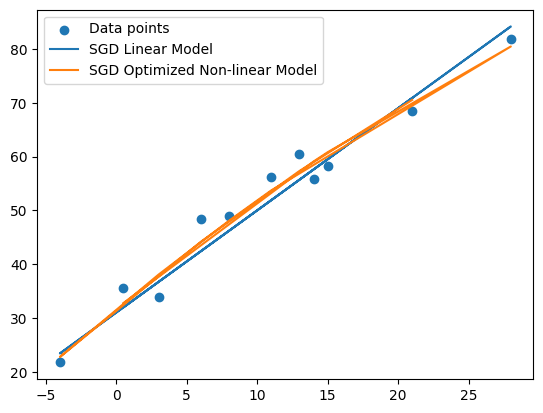

In [100]:
lin_params = torch.tensor([1.0, 0.0], requires_grad=True)
nonlin_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

lin_optimizer = optim.SGD([lin_params], lr = 1e-3)
SGD = optim.SGD([nonlin_params], lr = 1e-2)

lin = lin_training(5000, lin_optimizer, lin_params, t_u_train, t_u_valid, t_c_train, t_c_valid)
nonlin_SGD = nonlin_training(5000, SGD, nonlin_params, t_un_train, t_un_valid, t_c_train, t_c_valid)

t_p_lin = lin_model(t_u, *lin).detach().numpy()
t_p_nonSGD = nonlin_model(t_un, *nonlin_SGD).detach().numpy()

plt.scatter(t_u, t_c, label = 'Data points')
plt.plot(t_u, t_p_lin, label = 'SGD Linear Model')
plt.plot(t_u, t_p_nonSGD, label = 'SGD Optimized Non-linear Model')

plt.legend()
plt.show()